In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session_climate = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
#in this cell is another way to do cell below with tutor
#not sure I need this cell, decide on whether deleting before submitting
recent_date2 = session_climate.query(func.max(Measurement.date)).first()
recent_date2


('2017-08-23',)

In [12]:
# Find the most recent date in the data set.
#this was first script but had a list instead of only the most recent date
#recent_date = session_climate.query(Measurement.date).order_by(desc(Measurement.date)).all()
#recent_date

first_recentdate = session_climate.query(func.max(Measurement.date)).first()
first_recentdate

('2017-08-23',)

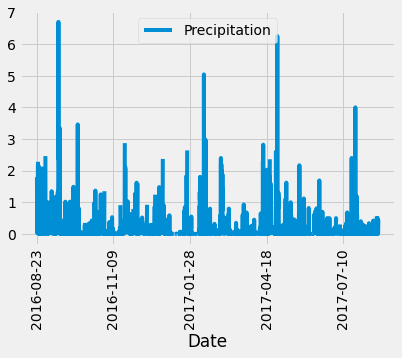

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# all_precipitation_data = session_climate.query(func.min(Measurement.date)).first()
# all_precipitation_data
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23)-dt.timedelta(days=365) 

# Perform a query to retrieve the date and precipitation scores
results = session_climate.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=prev_year).all()
results
# Save the query results as a Pandas DataFrame and set the index to the date column
df_results = pd.DataFrame(results, columns =["Date","Precipitation"])
# Sort the dataframe by date
df_results =df_results.sort_values("Date")
df_results
# Use Pandas Plotting with Matplotlib to plot the data


df_results.plot(x='Date', y='Precipitation', rot=90)


In [14]:
df_results

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_results.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
number_stations = session_climate.query(func.count(Station.station)).all()

number_stations

[(9,)]

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session_climate.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session_climate.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()






[(54.0, 85.0, 71.66378066378067)]

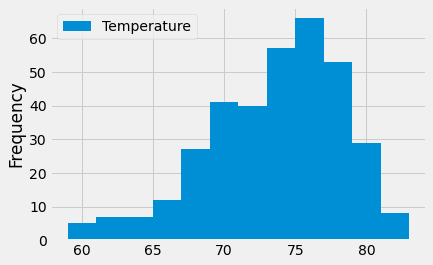

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017,8,23)-dt.timedelta(days=365) 

pre_hist = session_climate.query(Measurement.tobs).filter(Measurement.station=="USC00519281").filter(Measurement.date>=prev_year).all()
df_res = pd.DataFrame(pre_hist, columns=["Temperature"])
df_res
df_res.plot.hist(bins=12)

# since this list is 365 days, we can bin this evenly into 12 months to get month data

# Close session

In [21]:
# Close Session
session_climate.close()